In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [12]:
S2 = 0.4225
gamma = 0.9 #0.5*(1+(1+2)**(-1))
omega1 = np.arange(0,1.5,0.01)

##### S2

In [13]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [14]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t)+np.pi)
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [15]:
def k_shift(omega,q):
    tp = (1+S2+np.power(omega,2))*(q)
    bttm = S2*(-1*(1+np.power(omega,2))*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [16]:
def w_max():
    return (gamma*S2/(1-gamma)-1)**(0.5)

In [17]:
k_list = k(omega1)

In [18]:
theta(omega1)

array([-0.52938644, -0.52935053, -0.52924282, -0.5290634 , -0.52881242,
       -0.52849006, -0.52809659, -0.52763232, -0.5270976 , -0.52649285,
       -0.52581855, -0.52507522, -0.52426342, -0.52338377, -0.52243695,
       -0.52142367, -0.52034467, -0.51920077, -0.5179928 , -0.51672164,
       -0.5153882 , -0.51399344, -0.51253833, -0.51102388, -0.50945114,
       -0.50782118, -0.50613508, -0.50439397, -0.50259896, -0.50075121,
       -0.49885189, -0.49690218, -0.49490327, -0.49285635, -0.49076265,
       -0.48862336, -0.4864397 , -0.4842129 , -0.48194417, -0.47963473,
       -0.47728579, -0.47489855, -0.47247423, -0.470014  , -0.46751905,
       -0.46499055, -0.46242967, -0.45983755, -0.45721531, -0.45456407,
       -0.45188494, -0.44917899, -0.44644728, -0.44369086, -0.44091075,
       -0.43810795, -0.43528345, -0.4324382 , -0.42957313, -0.42668917,
       -0.4237872 , -0.42086809, -0.41793268, -0.4149818 , -0.41201624,
       -0.40903676, -0.40604412, -0.40303905, -0.40002222, -0.39

In [19]:
np.sqrt(2)/2

0.7071067811865476

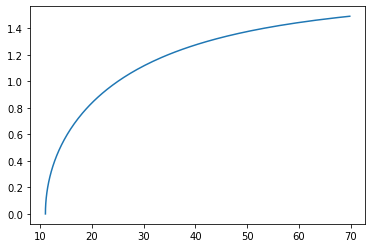

In [20]:
plt.plot(k_list,omega1)
# plt.xticks(np.arange(8,32,1))
plt.show()

In [28]:
data3=xr.open_dataset("SI_non_dim.nc")

In [29]:
# data3.growth_rate.isel(delta=0,N=0,t=0,gamma_index=0).values
data3

<xarray.Dataset>
Dimensions:      (k: 41, t: 1, N: 1, delta: 1, gamma_index: 1)
Coordinates:
  * k            (k) int32 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39 40
  * t            (t) int32 0
  * N            (N) float64 0.003162
  * delta        (delta) int32 0
  * gamma_index  (gamma_index) float64 0.0
Data variables:
    growth_rate  (t, N, delta, gamma_index, k) float64 ...
    gamma        (t, N, delta, gamma_index, k) float64 ...

Text(0, 0.5, 'Growth Rate')

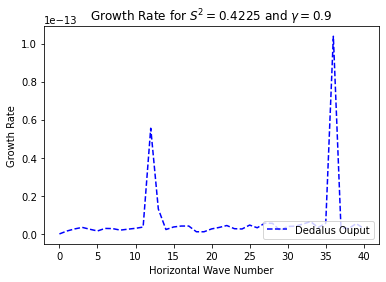

In [30]:
shft = 0 #3*np.pi/4
k_m = data3.k[:]#+k_shift(data3.growth_rate.isel(delta=0,N=0,gamma_index=0),shft)[:]
plt.plot(k_m[:],data3.growth_rate.isel(t=0,N=0,delta=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
# plt.plot(k_list[:],omega1[:],linestyle="dashed",c="r", label="Analytic solution")
# plt.hlines(w_max(),xmin=np.min([np.array([k_list[0]]),k_m.values[0]]),xmax=np.max([np.array([k_list[-1]]),k_m.values[-1]]),linestyles="dotted",color="k",label="Upper Limit of Analytical Solution")
plt.legend(loc="lower right")
plt.title(f"Growth Rate for $S^2=${S2} and $\gamma=${gamma}")
plt.xlabel("Horizontal Wave Number")
plt.ylabel("Growth Rate")

In [ ]:
data4=xr.open_dataset("PSI_non_dim_full_form.nc")

In [ ]:
k_m = data4.k[:]
plt.plot(k_m[:],data4.growth_rate.isel(delta=0,N=0,gamma_index=0)[:],color="b",linestyle="dashed",label="Dedalus Ouput")
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [ ]:
data5=xr.open_dataset("PSI_non_dim_field.nc")

In [ ]:
data5

In [ ]:
plt.plot(data5.v_structure.sel(k=40)/data5.v_structure.sel(k=14).max(),data5.z)
plt.ylabel("Vertical Height")
plt.xlabel("v-velocity")